In [1]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


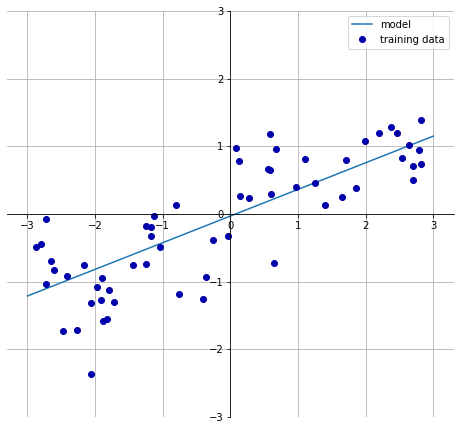

In [15]:
mglearn.plots.plot_linear_regression_wave()

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
lr = LinearRegression().fit(X_train, y_train)

In [18]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [19]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


$R^2$: around 0.66 (not very good)<br>
scores on the training and test sets are very close toghether: likely underfitting

In [20]:
X, y = mglearn.datasets.load_extended_boston()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Score on training set is close to 1; predict very accurately on the training set<br>
$R^2$ on the test set is much worse: clearly overfitting<br><br>
Should try to find a model that allows us to control complexity, __Ridge Regression__

In [23]:
from sklearn.linear_model import Ridge

In [24]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Compared to the result above, using LinearRegrssion, the training set score of Ridge is lower while the test set score is higher

In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #default alpha = 1.0
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


inspecting the coef_ attribute of models wtih different values of alpha

In [11]:
import matplotlib.pyplot as plt

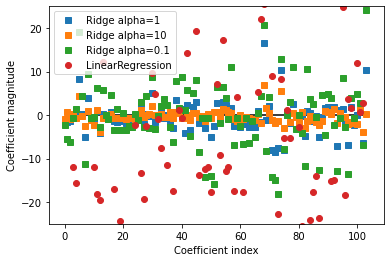

In [28]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, 's', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 's', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

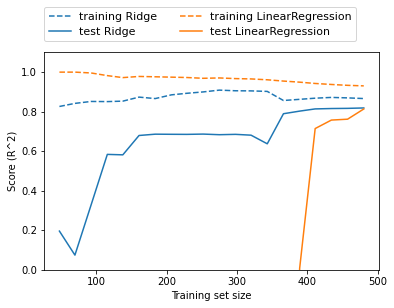

In [29]:
mglearn.plots.plot_ridge_n_samples()

- with enough training data, regularization becomes less important!
- if more data is added, it becomes harder for a model to overfit (decrease in training performance for linear regression)

__Lasso__<br>
- some coefficients are exactly zero (some features are entirely ignored by the model)
- makes a model easier to interpret
- can reveal the most important features of the model

In [30]:
from sklearn.linear_model import Lasso
import numpy as np

In [31]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [32]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [33]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

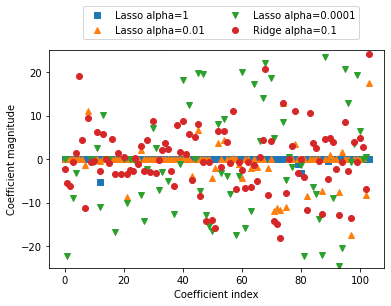

In [38]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0.1, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- In practice, _Ridge Regression_ is usually the first choice
- If you have a large amount of features and expect only a few of them to be important, _Lasso_ might be a better choice
- In practice, _ElasticNet_ class, which combines the penalties of Lasso and Ridge works best

#### Linear models for classification
Two most common linear classification algorithms are _logistic regression_ and _linear support vector machines_

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [42]:
X, y =mglearn.datasets.make_forge()

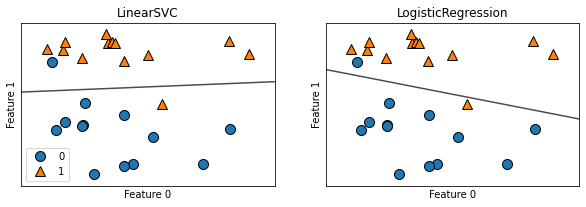

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression(max_iter=10000)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

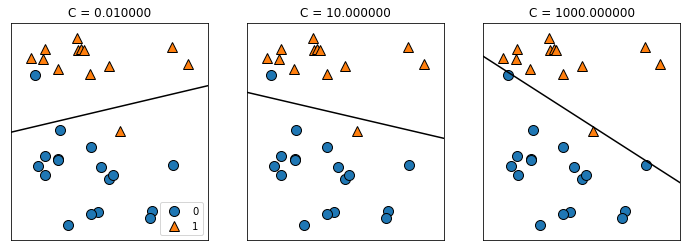

In [51]:
mglearn.plots.plot_linear_svc_regularization()

- Trade-off parameter that determines the strength of the regularization is called C <br>
- Higher values of C correspond to less regularization (tends to be overfitting)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [5]:
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training set score:", logreg.score(X_train, y_train))
print("Test set score:", logreg.score(X_test, y_test))

Training set score: 0.9577464788732394
Test set score: 0.958041958041958


In [9]:
logreg100 = LogisticRegression(C=100, max_iter=100000).fit(X_train, y_train)
print("Training set score:", logreg100.score(X_train, y_train))
print("Test set score:", logreg100.score(X_test, y_test))

Training set score: 0.9835680751173709
Test set score: 0.965034965034965


In [10]:
logreg001 = LogisticRegression(C=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score:", logreg001.score(X_train, y_train))
print("Test set score:", logreg001.score(X_test, y_test))

Training set score: 0.9530516431924883
Test set score: 0.951048951048951


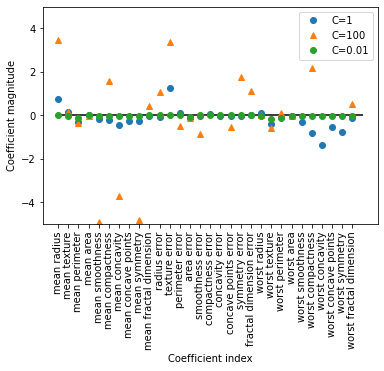

In [12]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'o', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()